In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pickle import dump

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from matplotlib import pyplot
from pickle import load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df_BTC = pd.read_csv('https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Problem_Set_1.Peilin_Wu/refs/heads/main/Data/bitcoin0.csv',parse_dates=['time'])
df_ETH = pd.read_csv('https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Problem_Set_1.Peilin_Wu/refs/heads/main/Data/ETH.csv')
df_DOG = pd.read_csv('https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Problem_Set_1.Peilin_Wu/refs/heads/main/Data/dogecoin.csv')


<ipython-input-25-d36b2700e0b6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_BTC = pd.read_csv('https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Problem_Set_1.Peilin_Wu/refs/heads/main/Data/bitcoin0.csv',parse_dates=['time'])


In [21]:
df_BTC

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,ts,timeDate
0,1636588800000,64801.27,65587.58,64116.52,64890.79,96656.44,6.273777e+09,direct,NaN,1636588800,2021-11-11
1,1636675200000,64124.99,65438.84,62301.13,64801.27,108333.17,6.934238e+09,direct,NaN,1636675200,2021-11-12
2,1636761600000,64380.18,64947.06,63364.92,64124.99,105199.77,6.733912e+09,direct,NaN,1636761600,2021-11-13
3,1636848000000,65501.46,65509.50,63595.03,64380.18,69629.99,4.490025e+09,direct,NaN,1636848000,2021-11-14
4,1636934400000,63602.29,66340.94,63425.12,65501.46,97656.82,6.344182e+09,direct,NaN,1636934400,2021-11-15
...,...,...,...,...,...,...,...,...,...,...,...
1091,1730851200000,75574.81,76389.27,69297.18,69375.59,243053.05,1.796738e+10,NaN,NaN,1730851200,2024-11-06
1092,1730937600000,75857.21,76834.00,74420.59,75574.81,120930.87,9.137331e+09,NaN,NaN,1730937600,2024-11-07
1093,1731024000000,76504.56,77191.78,75578.37,75857.21,98754.96,7.527714e+09,NaN,NaN,1731024000,2024-11-08
1094,1731110400000,76674.42,76905.38,75714.36,76504.56,48107.70,3.675323e+09,NaN,NaN,1731110400,2024-11-09


In [22]:
coin_list = [df_BTC,df_ETH,df_DOG]
coin_name = ['Bitcoin', 'Ethereum', 'Dogecoin']

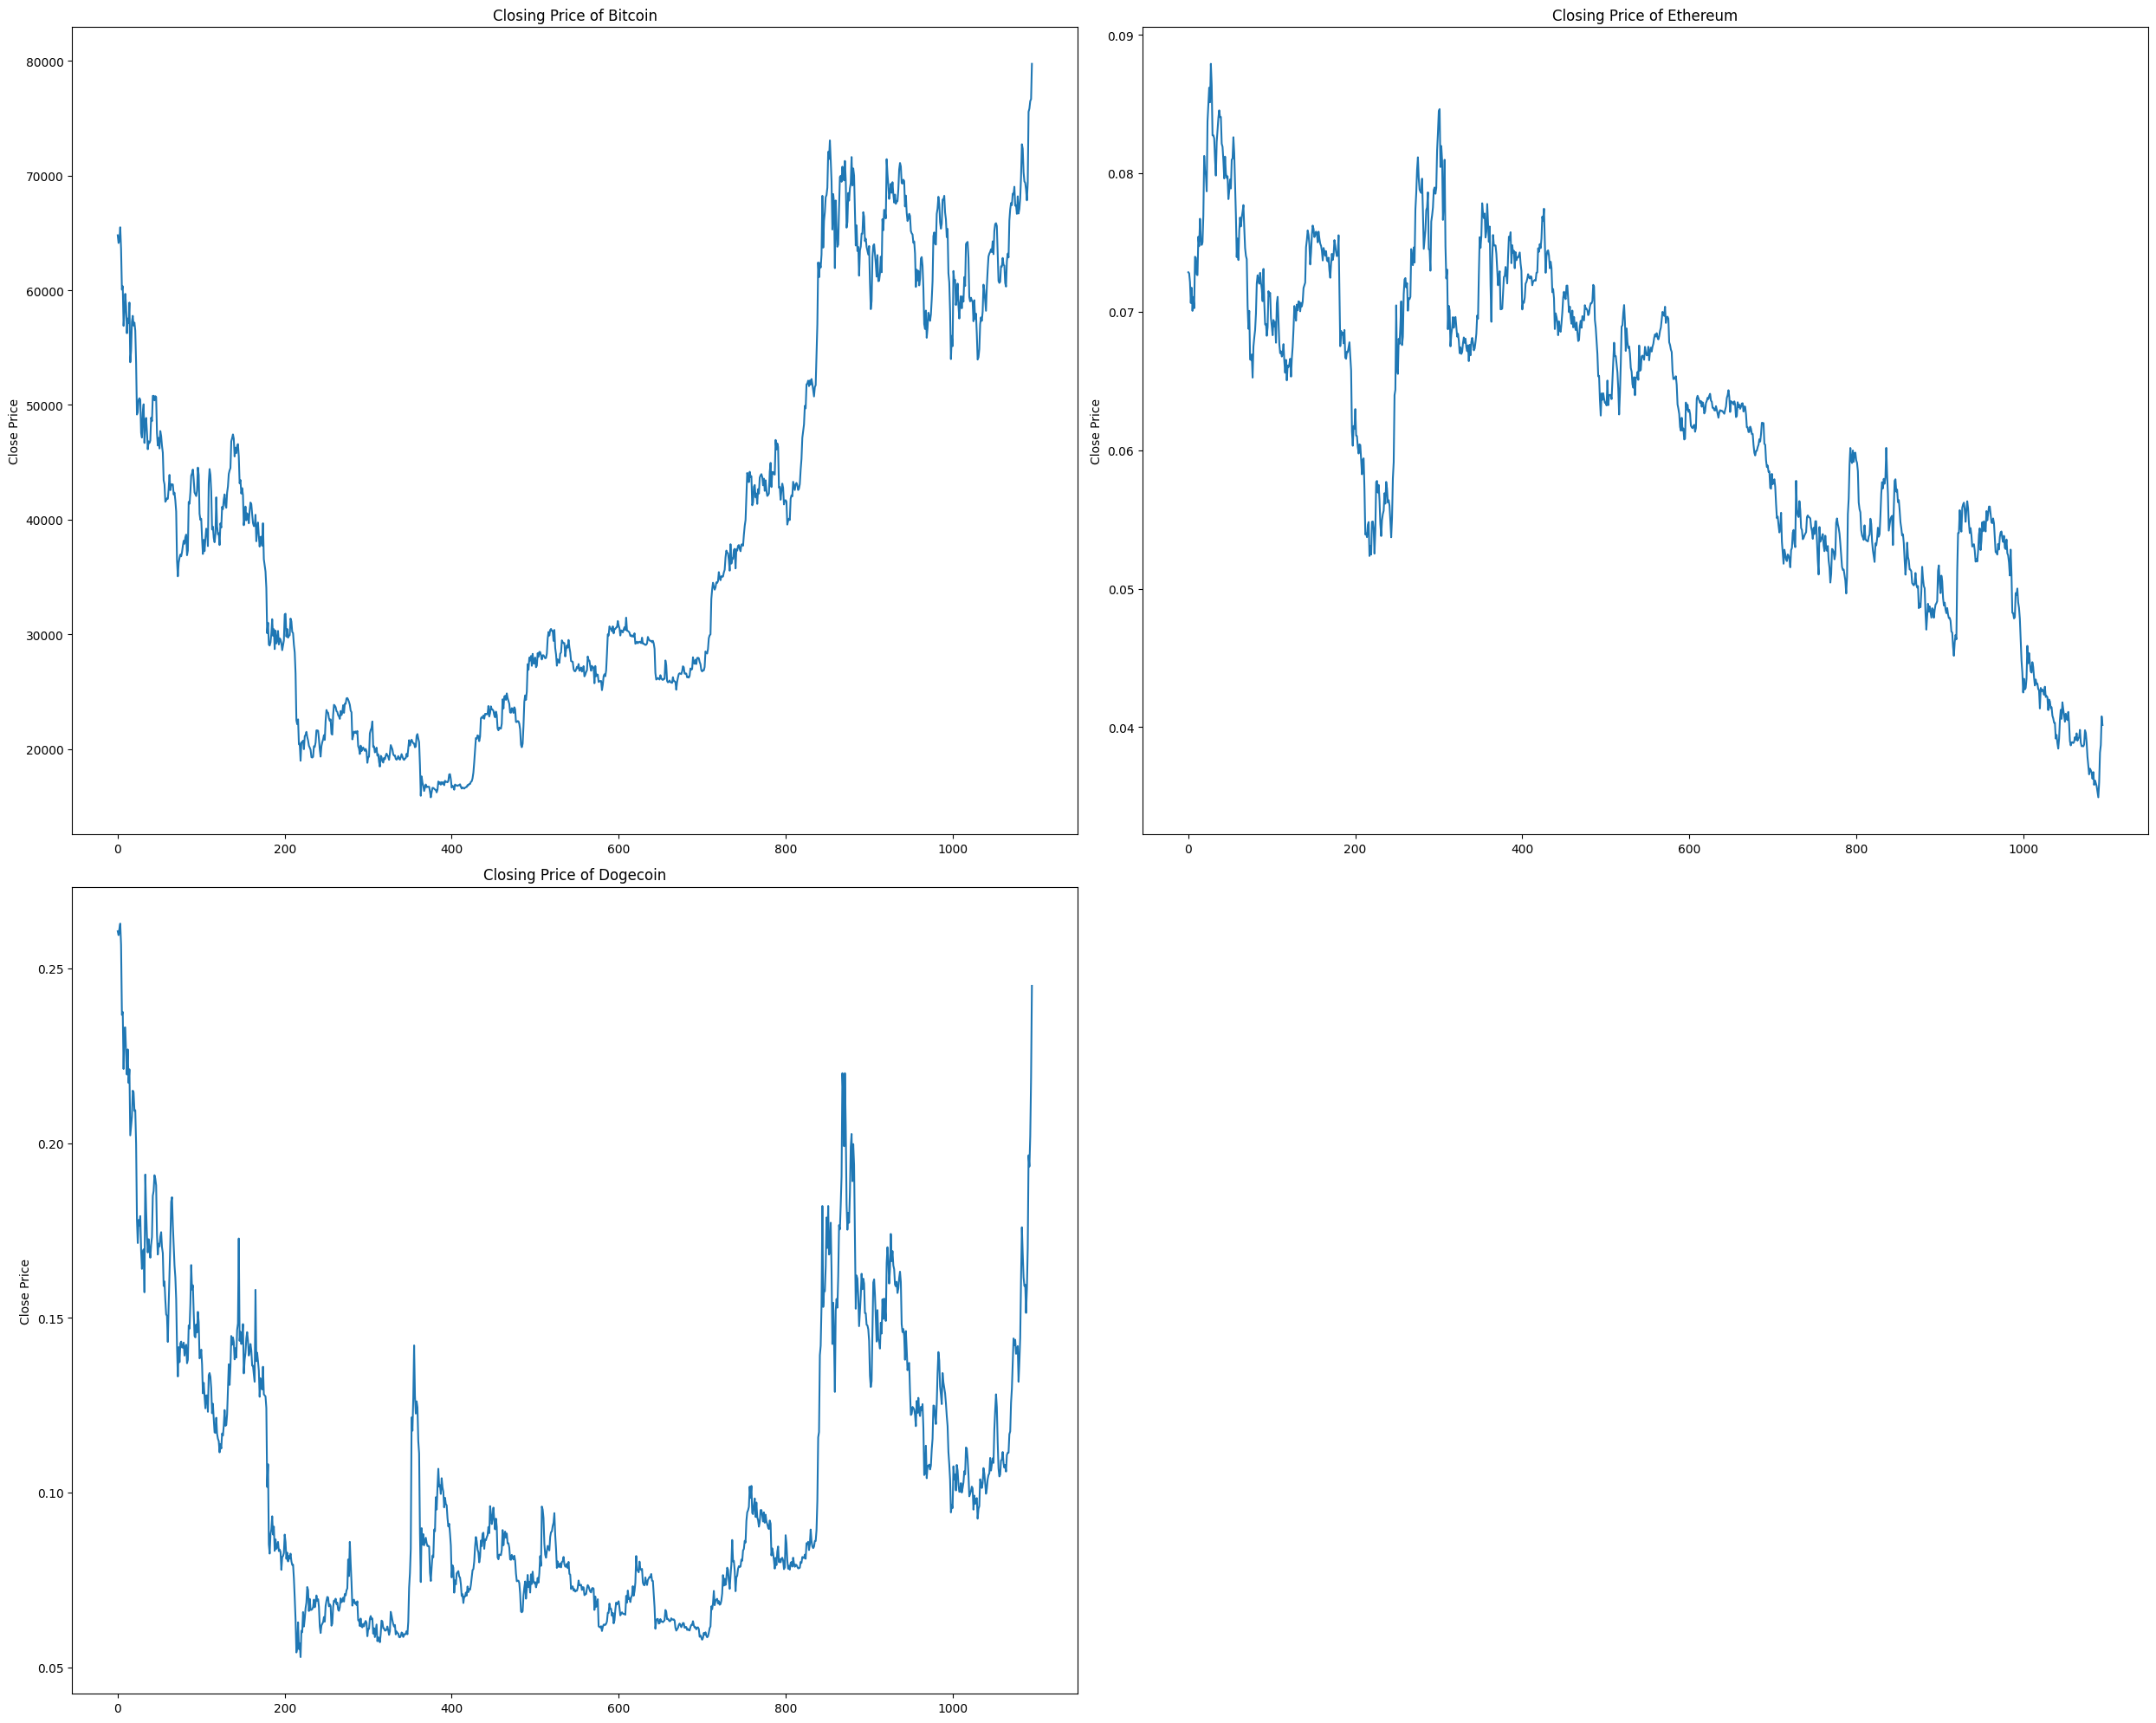

In [26]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(top=2, bottom=1.8)

for i, coin in enumerate(coin_list, 1):
    plt.subplot(2, 2, i)
    coin['close'].plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {coin_name[i - 1]}")

plt.tight_layout()

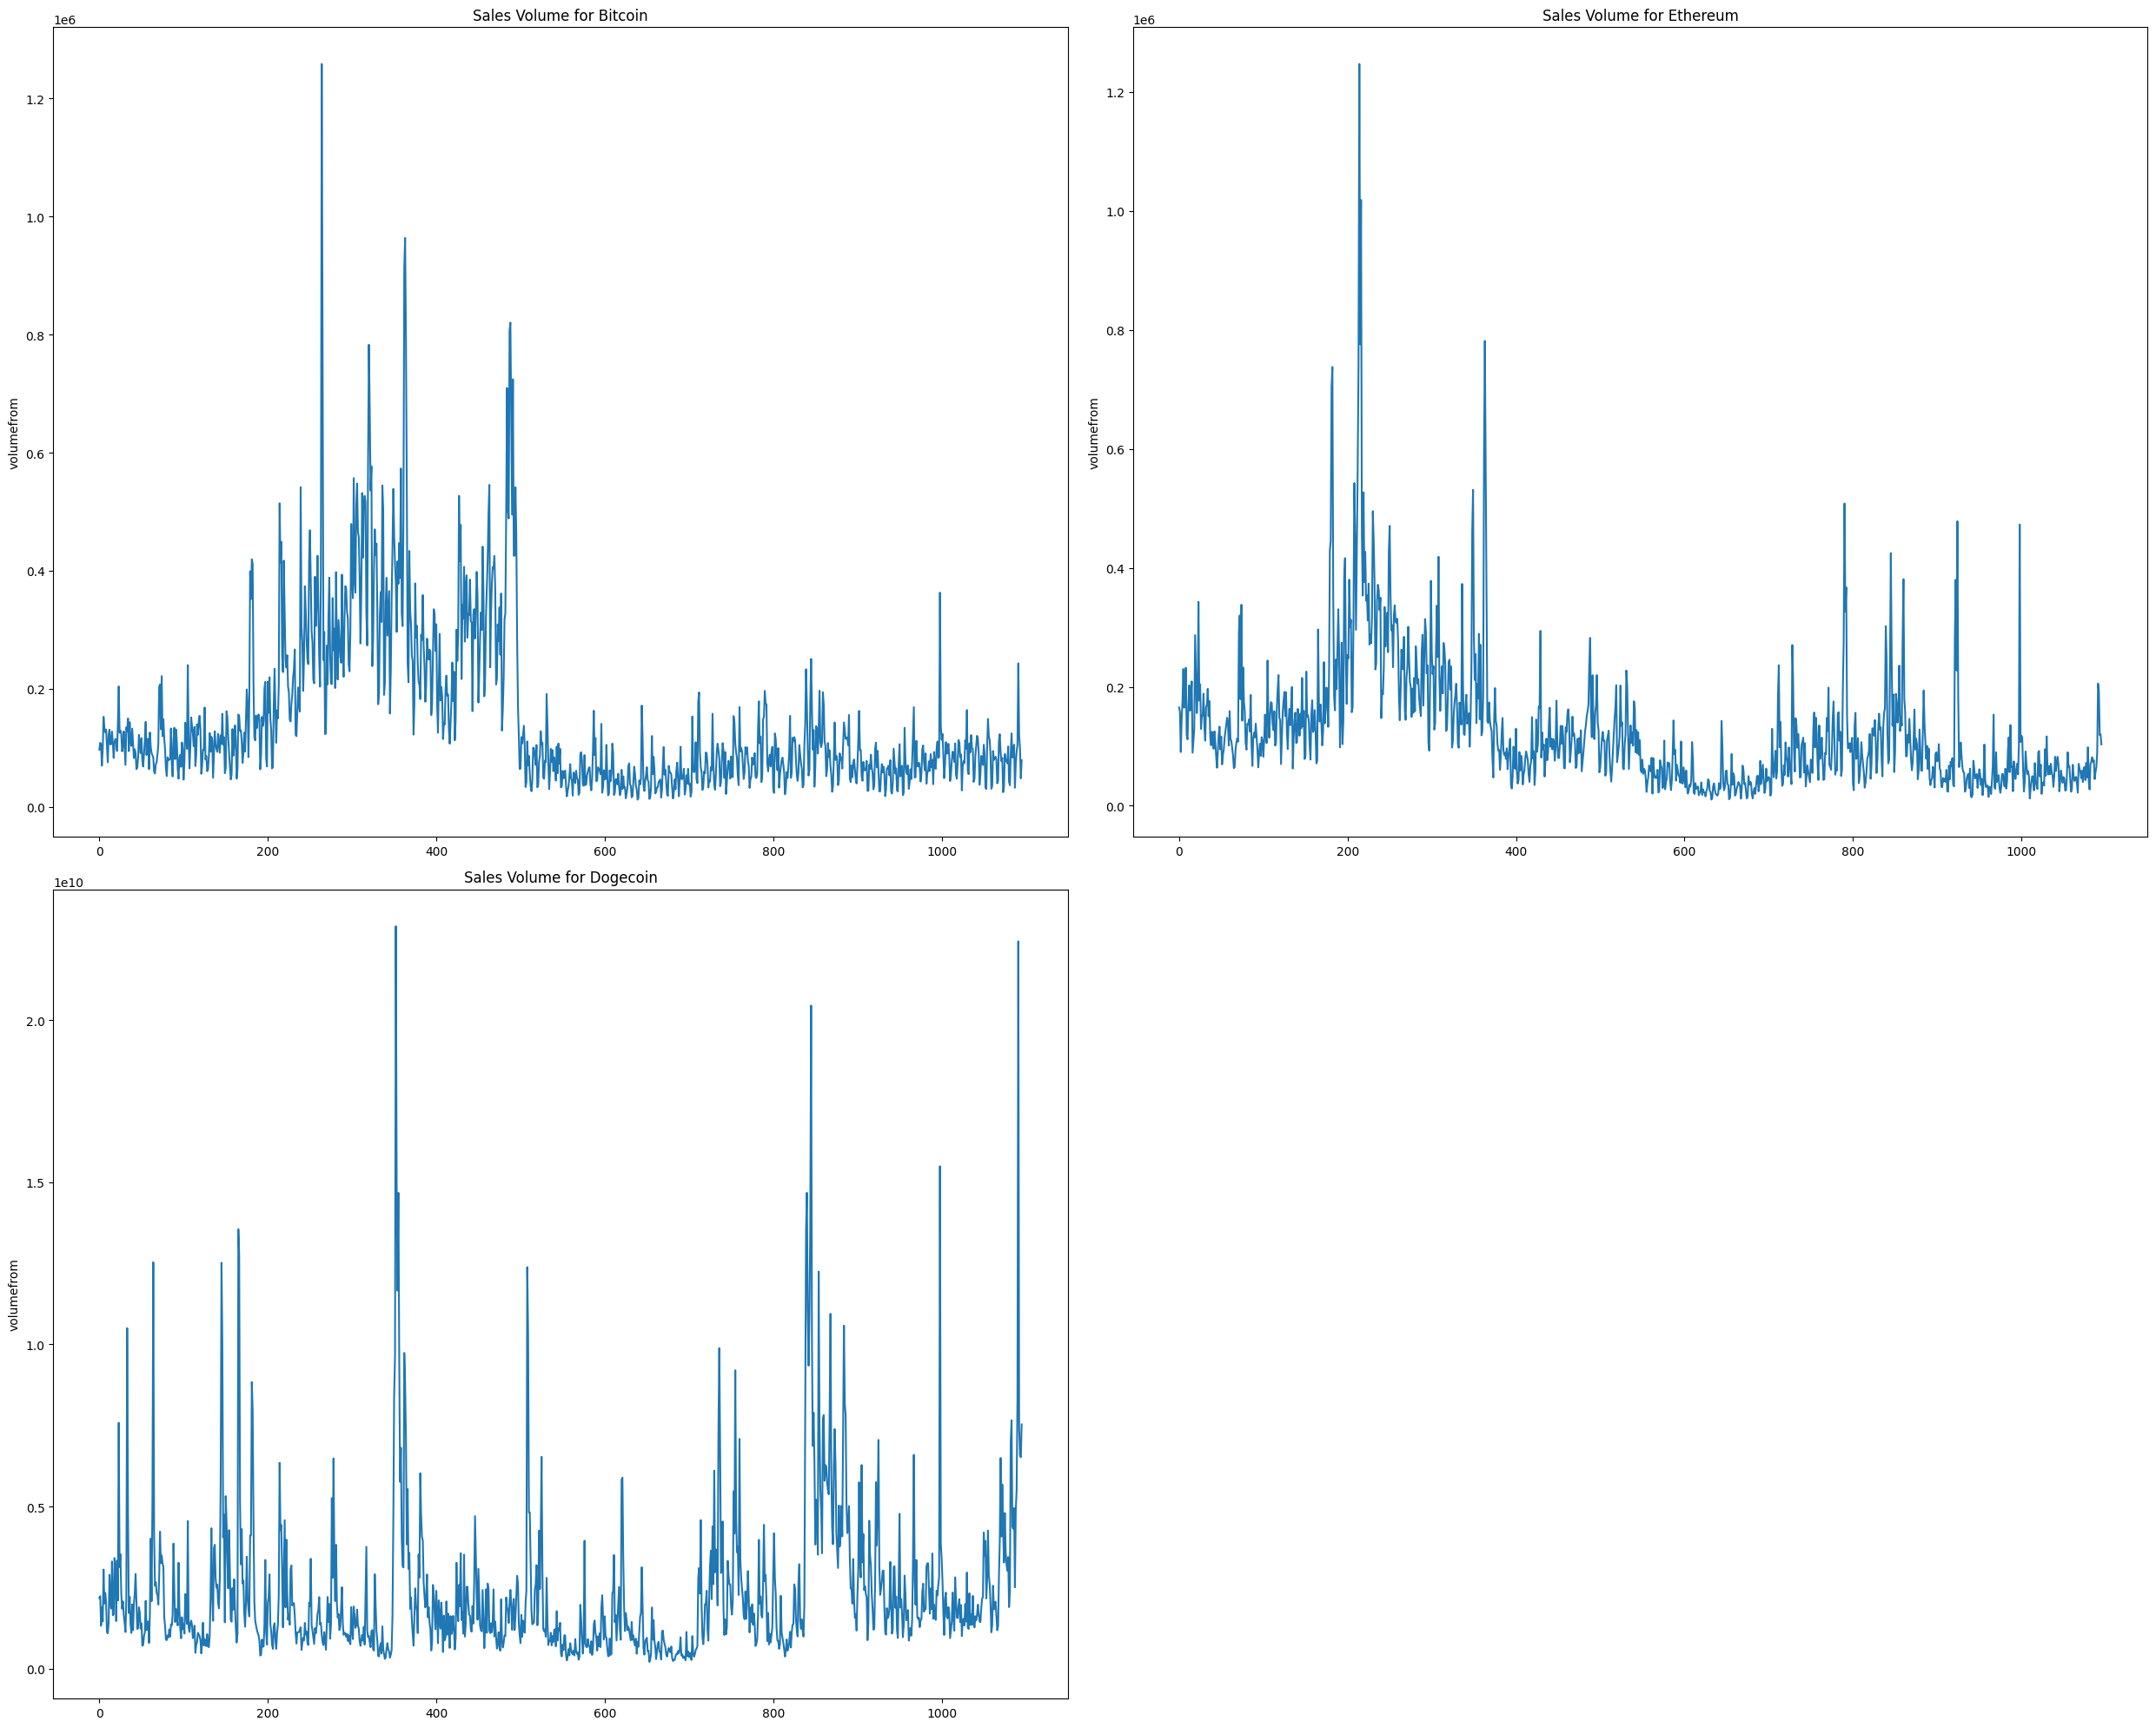

In [27]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(top=2, bottom=1.8)

for i, coin in enumerate(coin_list, 1):
    plt.subplot(2, 2, i)
    coin['volumefrom'].plot()
    plt.ylabel('volumefrom')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {coin_name[i - 1]}")

plt.tight_layout()

            周  bitcoin: (全球)
0  2021-11-07             56
1  2021-11-14             56
2  2021-11-21             55
3  2021-11-28             56
4  2021-12-05             55
Index(['周', 'bitcoin: (全球)'], dtype='object')


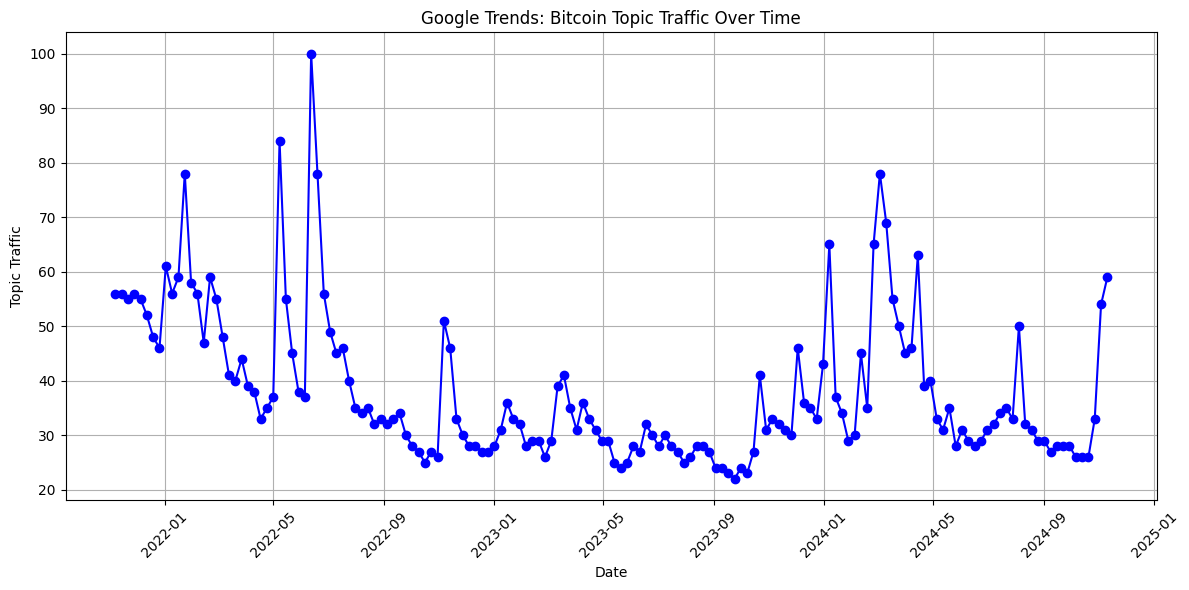

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Problem_Set_1.Peilin_Wu/refs/heads/main/Data/google%20trends/multiTimelinebitcoin.csv'

# Load the CSV file with appropriate adjustments
data = pd.read_csv(url, header=1)  # Skip the first header row

# Display the first few rows and the columns of the data
print(data.head())
print(data.columns)

# Rename columns for easier access
data.columns = ['date', 'value']  # Rename appropriately based on your dataset

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['value'], marker='o', linestyle='-', color='blue')
plt.title('Google Trends: Bitcoin Topic Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Topic Traffic')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
